In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils

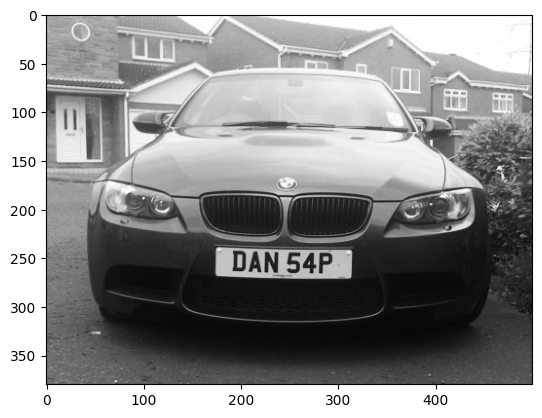

In [3]:
image_file = "images/Cars252.png" # this thing works perfectly for 250
img = cv2.imread(image_file)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

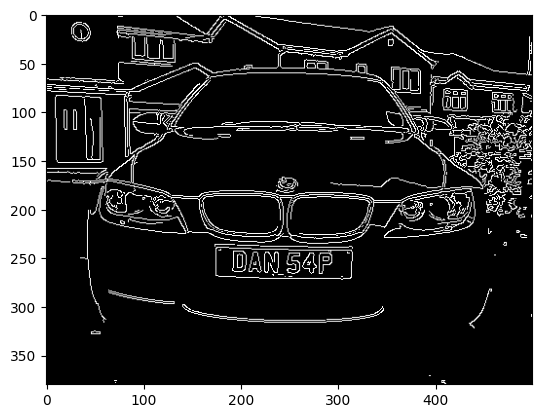

In [4]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 40, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [5]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

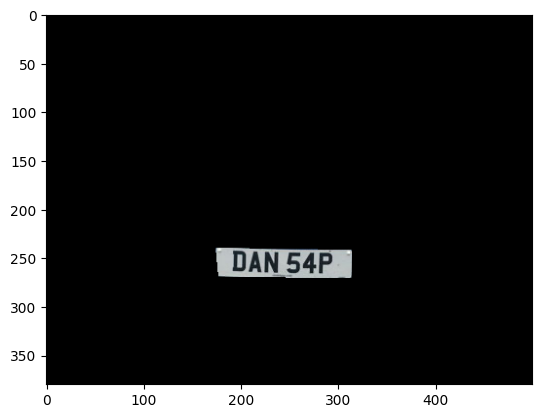

In [6]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [8]:
location

array([[[174, 240]],

       [[177, 269]],

       [[313, 270]],

       [[313, 242]]], dtype=int32)

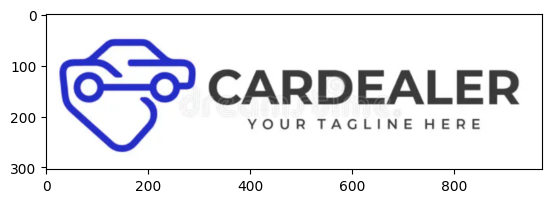

In [9]:
logo  = cv2.imread("logo.png")
plt.imshow(logo) 

In [16]:
location


array([[[174, 240]],

       [[177, 269]],

       [[313, 270]],

       [[313, 242]]], dtype=int32)

In [33]:
length1 = location[0][0][0]
if (location[0][0][0] > location[1][0][0]):
    lentht1 = location[1][0][0]

length2 = location[2][0][0]
if (location[0][0][0] < location[3][0][0]):
    lentht1 = location[1][0][0]

height1 = location[0][0][1]
if (location[0][0][1] < location[3][0][1]):
    lentht1 = location[3][0][1]

height2 = location[1][0][1]
if (location[1][0][1] < location[2][0][1]):
    lentht1 = location[2][0][1]

plate_location = [height1, height2, length1, length2]

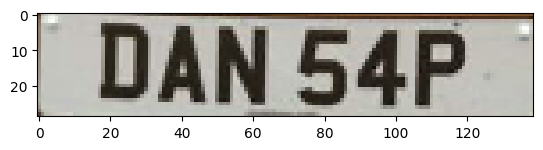

In [34]:
plt.imshow(img[plate_location[0]: plate_location[1],plate_location[2]:plate_location[3],:]) 

In [35]:
dim = (plate_location[3]-plate_location[2], plate_location[1]-plate_location[0])
resized = cv2.resize(logo, dim, interpolation = cv2.INTER_AREA)
img[plate_location[0]: plate_location[1],plate_location[2]:plate_location[3],:] = resized

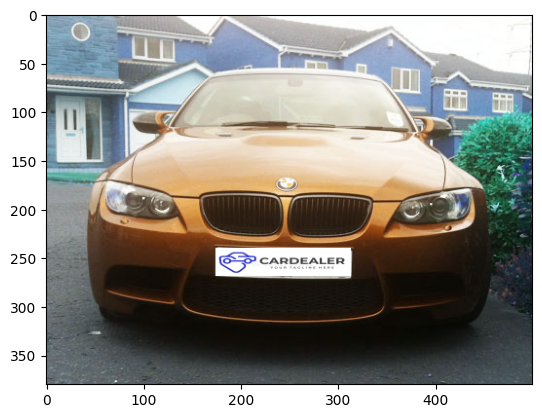

In [36]:
plt.imshow(img)